## Import Libaries And Load DataSets

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

In [6]:
df=pd.read_csv("retail_sales_dataset.csv")

In [7]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [8]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [11]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


## Dataset Overview & Cleaning

In [12]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

## Data Preparation

In [21]:
# Convert Date column

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [22]:
# Create new time-based columns

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

In [23]:
# Recalculate Total Amount if not present

if 'Total Amount' not in df.columns:
    df['Total Amount'] = df['Quantity'] * df['Price per Unit']

## Date column se humne naya information nikala jaise Year, Month, 
# Weekday — taaki time-based analysis ho sake.


## Summary Statistics

In [26]:
# Numerical summary
df.describe()

# Category distribution
df['Product Category'].value_counts()
df['Gender'].value_counts()


Gender
Female    510
Male      490
Name: count, dtype: int64

## Exploratory Data Analysis

In [27]:
#Q1️ — How does customer age and gender influence their purchasing behavior? 

##  Boxplot

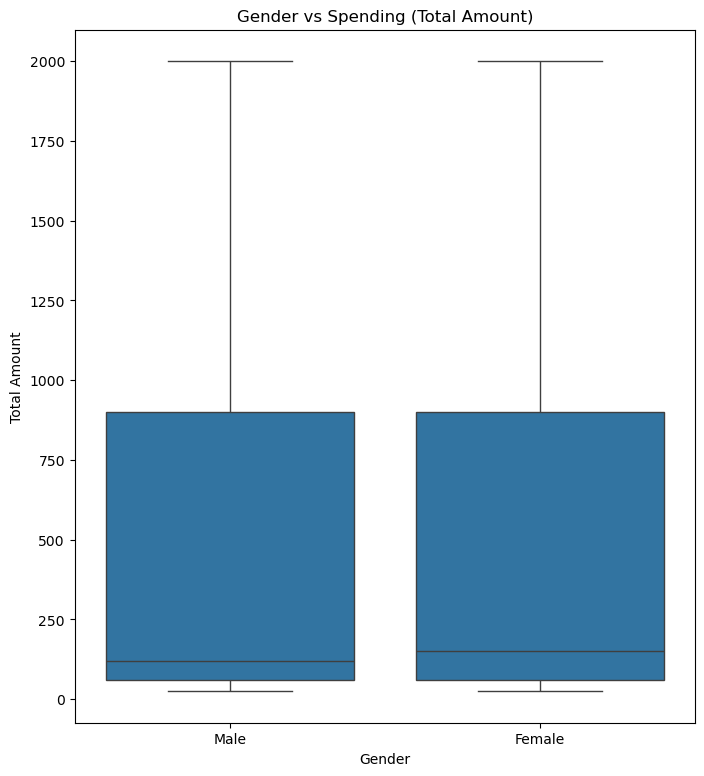

In [33]:
plt.figure(figsize=(8,9))
sns.boxplot(data=df, x='Gender', y ='Total Amount')
plt.title("Gender vs Spending (Total Amount)")
plt.show()

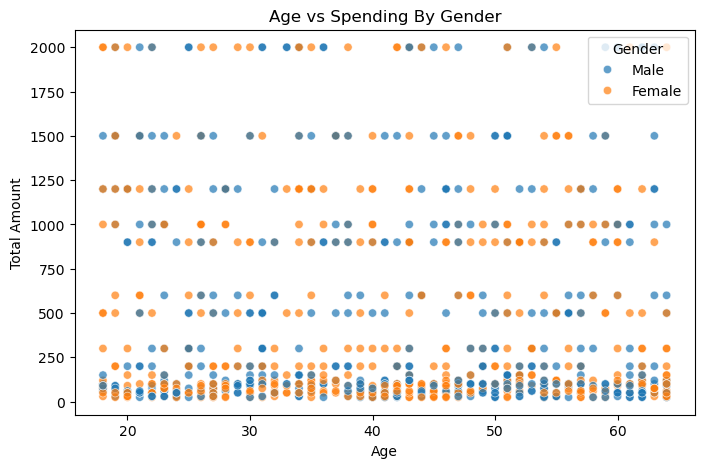

In [47]:
## Scatterplot

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x= "Age", y='Total Amount', hue='Gender', alpha=0.7)
plt.title("Age vs Spending By Gender")
plt.show()

## Boxplot aur scatterplot se dekh sakte hain ki kis gender group ya age range mein spending zyada hoti hai.
## Example: Females 25-35 age group zyada spend kar rahi hain toh marketing unpe focus ho sakti hai.

In [37]:
## Q2️ — Are there discernible patterns in sales across different time periods?

In [38]:
## Lineplot

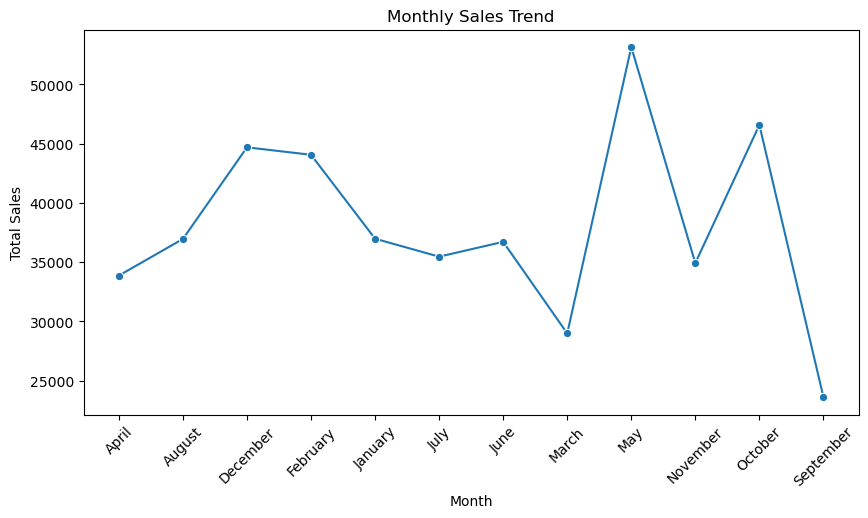

In [41]:
monthly_sales = df.groupby('Month')['Total Amount'].sum().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

weekday_sales = df.groupby('Weekday')['Total Amount'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)



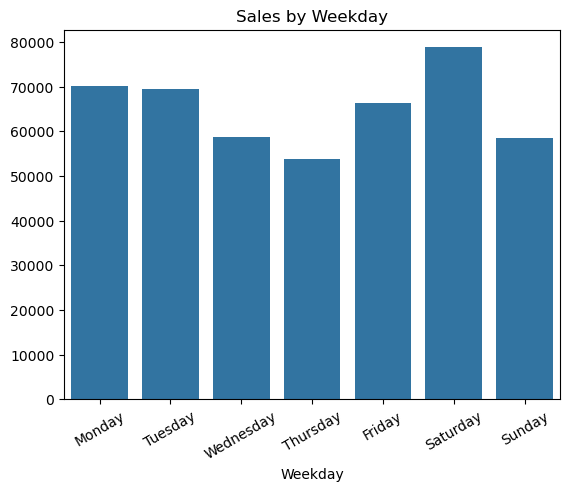

In [42]:
# Barplot

sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
plt.title('Sales by Weekday')
plt.xticks(rotation=30)
plt.show()


## Month aur weekday ke basis pe dekh rahe hain ki kab sales peak hoti hai.
# Weekend sales zyada hone ka matlab — offers aur campaigns un dinon pe plan karne chahiye.

In [ ]:
#Q3️— Which product categories hold the highest appeal among customers?

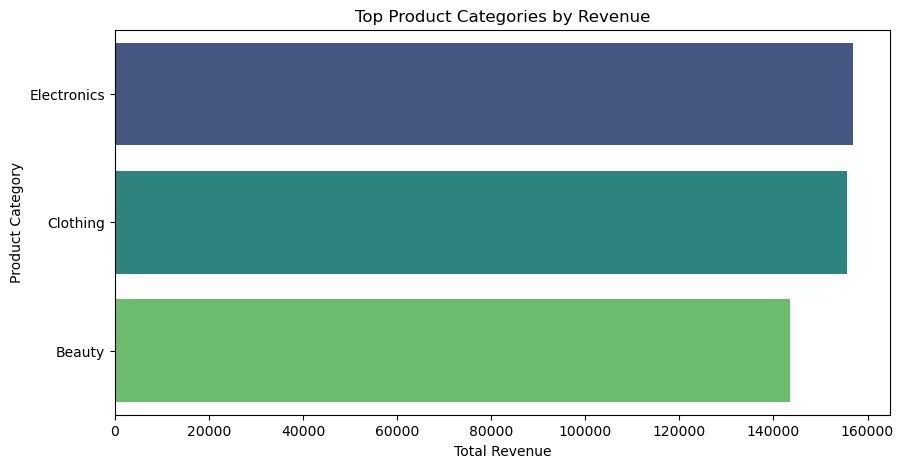

In [44]:
# Barplot
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

category_df = category_sales.reset_index()
category_df.columns = ['Product Category', 'Total Sales']

plt.figure(figsize=(10,5))
sns.barplot(
    data=category_df,
    x='Total Sales',
    y='Product Category',
    hue='Product Category',
    palette='viridis',
    legend=False
)
plt.title('Top Product Categories by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()


## sse pata chalta hai ki kaunse product category business ke liye sabse zyada revenue la rahi hai
# — e.g., “Electronics” > “Clothing”.

In [ ]:
# Q4️ — What are the relationships between age, spending, and product preferences?

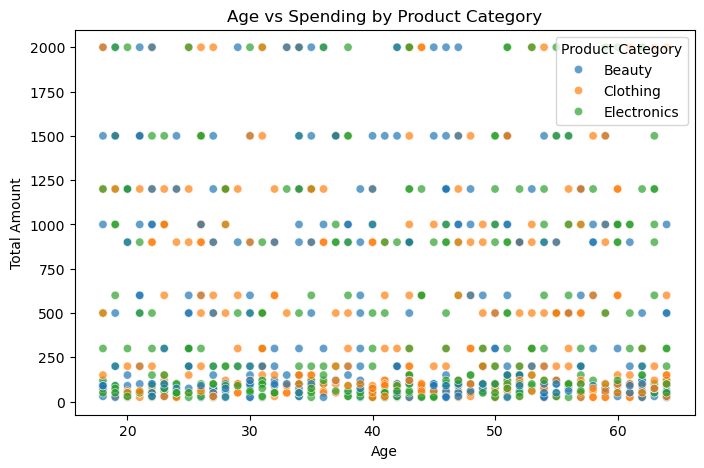

In [46]:
# acatterplot

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Total Amount', hue='Product Category', alpha=0.7)
plt.title('Age vs Spending by Product Category')
plt.show()


# Ye scatterplot dikhata hai kis age group ko kaunsi category pasand hai.
# Example: Younger customers fashion items zyada kharidte hain, older group household goods.

In [48]:
##Q5️ — How do customers adapt their shopping habits during seasonal trends? 

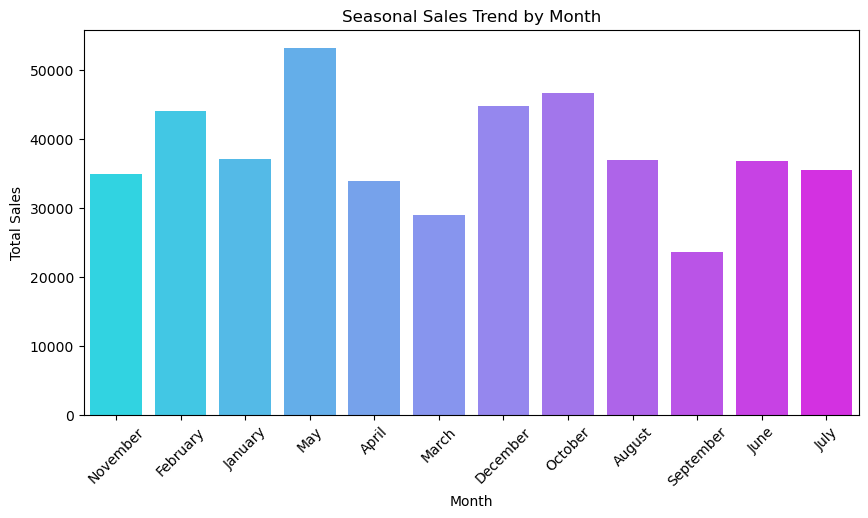

In [50]:
# boxplot
# Seasonal trends by month
plt.figure(figsize=(10,5))
sns.barplot(
    x='Month',
    y='Total Amount',
    data=df,
    estimator='sum',
    errorbar=None,         # replaces ci=None
    hue='Month',           # to apply palette properly
    palette='cool',
    legend=False           # hide redundant legend
)
plt.title('Seasonal Sales Trend by Month')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()



# Boxplot se category-wise price range samajh aati hai — high variance wale category mein premium aur budget dono products ho sakte hain.

## Correlation Analysis

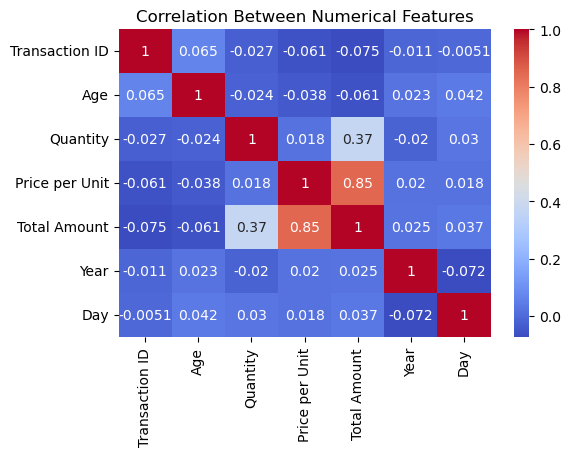

In [51]:
# heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

## Correlation matrix batata hai kaunsi features ek-dusre se related hain (e.g., Quantity aur Total Amount ka strong positive correlation).

In [52]:
df.to_csv("cleaned_retail_sales.csv", index=False)


In [53]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Day,Weekday
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,November,24,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,February,27,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,January,13,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,May,21,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,May,6,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023,May,16,Tuesday
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023,November,17,Friday
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023,October,29,Sunday
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023,December,5,Tuesday
